In [1]:
%matplotlib inline

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, RANSACRegressor

# Linear and Logistic Regression

In [4]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
dataset = fetch_california_housing()

In [8]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [9]:
dataset.data # sklearn-format 2-dimentional numpy array 

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [13]:
dataset = fetch_california_housing(as_frame = True)
dataset.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [14]:
house_data = dataset.frame

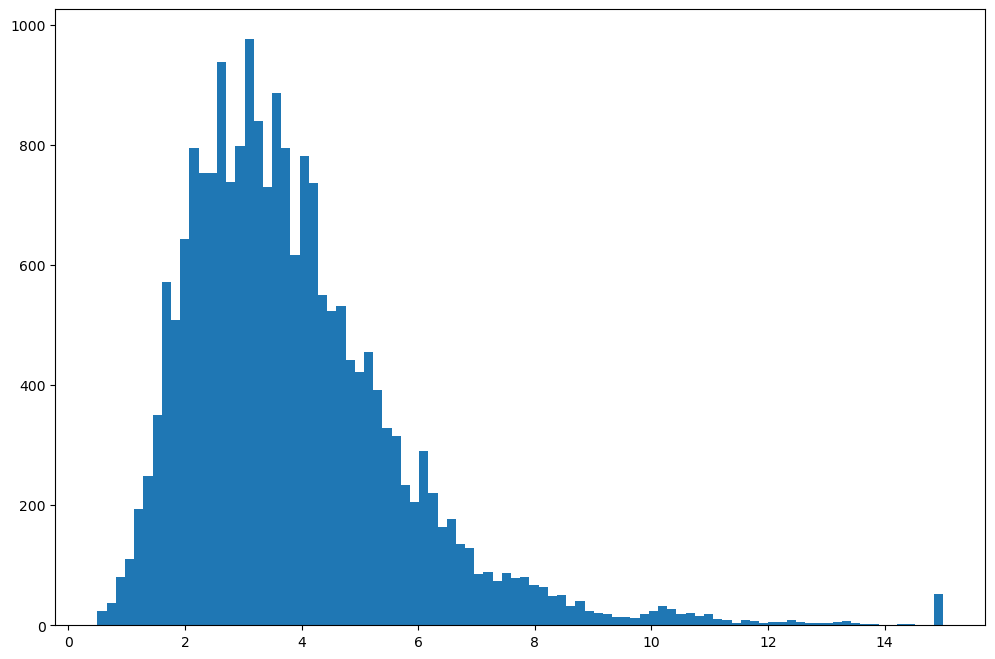

In [22]:
plt.figure(figsize=(12, 8))
plt.hist(house_data.MedInc, bins = 'fd')
plt.show()

In [25]:
house_data[house_data.MedInc > 15]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1566,15.0001,2.0,22.222222,2.222222,25.0,2.777778,37.74,-121.96,3.50000
4352,15.0001,37.0,8.659574,1.425532,100.0,2.127660,34.10,-118.37,5.00001
4604,15.0001,52.0,8.444954,1.100917,693.0,3.178899,34.06,-118.33,5.00001
4605,15.0001,52.0,8.483019,0.962264,813.0,3.067925,34.07,-118.33,5.00001
4606,15.0001,52.0,9.204969,1.062112,531.0,3.298137,34.07,-118.33,5.00001
4626,15.0001,52.0,7.958333,0.833333,457.0,3.808333,34.06,-118.32,5.00001
4678,15.0001,52.0,8.780612,0.994898,688.0,3.510204,34.08,-118.34,5.00001
5242,15.0001,32.0,8.002869,1.080344,1567.0,2.248207,34.11,-118.40,5.00001
5247,15.0001,36.0,9.368263,1.173653,862.0,2.580838,34.09,-118.44,5.00001
5248,15.0001,46.0,8.365591,0.967742,238.0,2.559140,34.08,-118.43,5.00001


In [26]:
house_data[house_data.MedInc > 14].sort_values('MedInc')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
5304,14.2867,49.0,7.603774,0.946541,850.0,2.672956,34.07,-118.46,5.00001
15698,14.2959,52.0,8.172727,0.872727,304.0,2.763636,37.79,-122.46,5.00001
9811,14.4113,28.0,11.634686,1.509225,569.0,2.099631,36.57,-121.94,5.00001
16915,14.4219,52.0,8.253731,0.950249,519.0,2.582090,37.56,-122.35,5.00001
9370,14.5833,24.0,5.613333,0.853333,163.0,2.173333,37.92,-122.52,5.00001
10483,14.9009,8.0,9.860169,1.114407,899.0,3.809322,33.59,-117.68,5.00001
18052,15.0000,19.0,7.626263,0.939394,267.0,2.696970,37.25,-121.98,5.00001
5260,15.0000,39.0,9.293750,1.018750,414.0,2.587500,34.05,-118.50,5.00001
8853,15.0001,52.0,9.867036,1.091413,1163.0,3.221607,34.07,-118.41,5.00001
8854,15.0001,52.0,8.710145,1.028986,408.0,2.956522,34.07,-118.41,5.00001


In [27]:
# is there duplications
house_data.drop_duplicates().shape

(20640, 9)

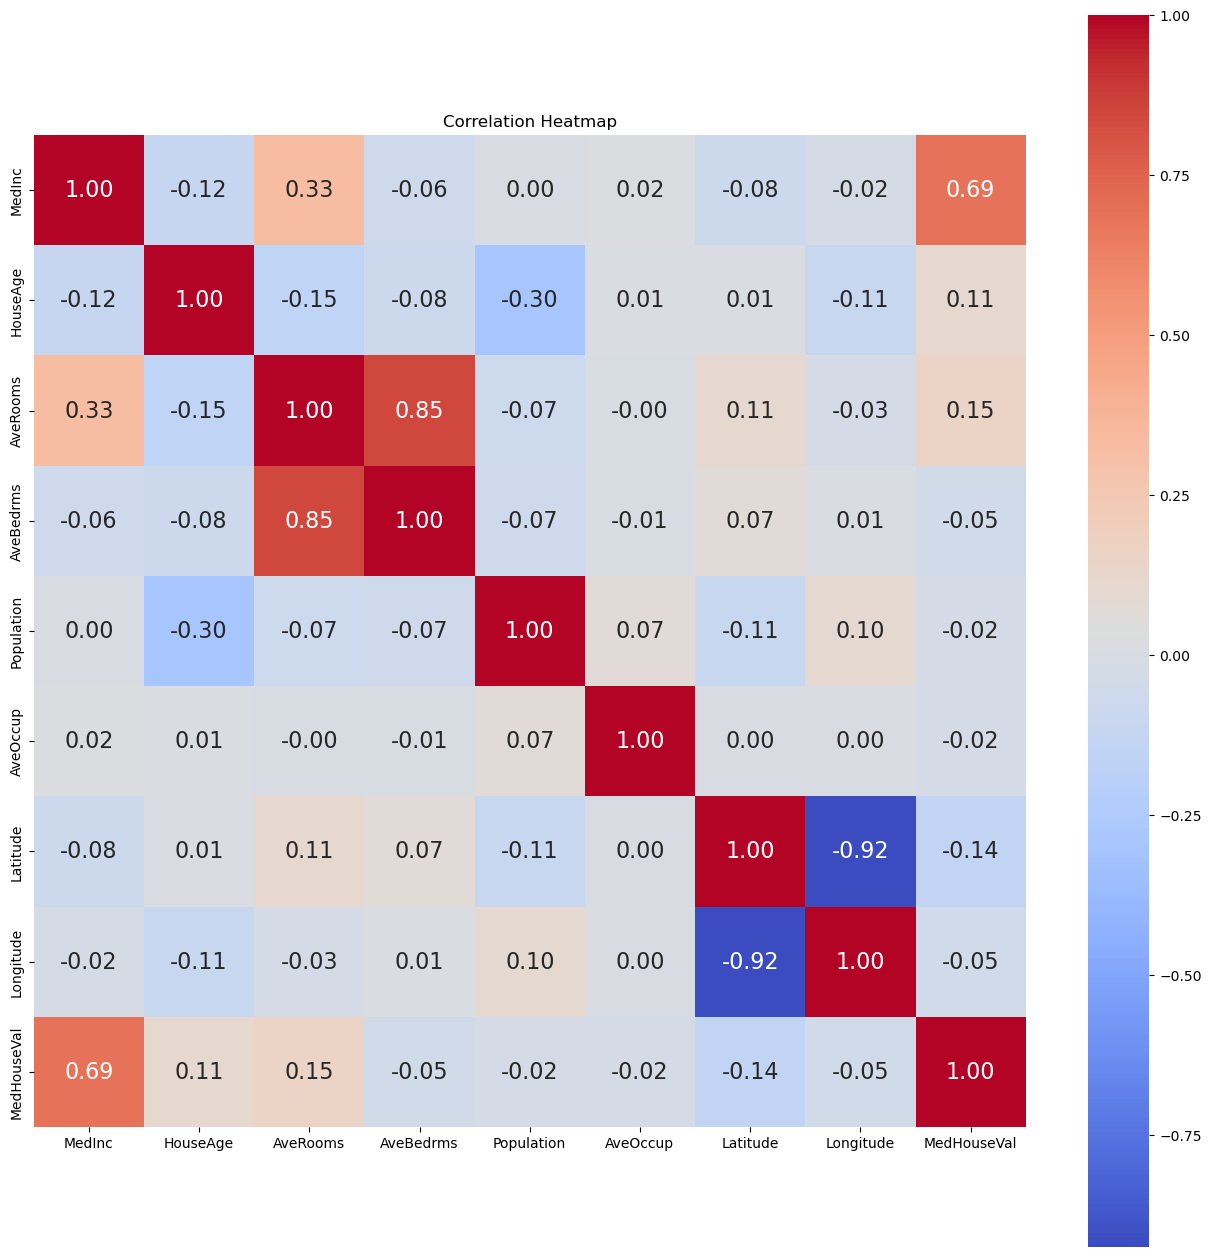

In [38]:
# house_data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(house_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, annot_kws={"size": 16})
plt.title('Correlation Heatmap')
plt.show()

In [42]:
house_data.HouseAge.value_counts()

HouseAge
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64

In [43]:
house_data.HouseAge.sort_values().unique().tolist()

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0]

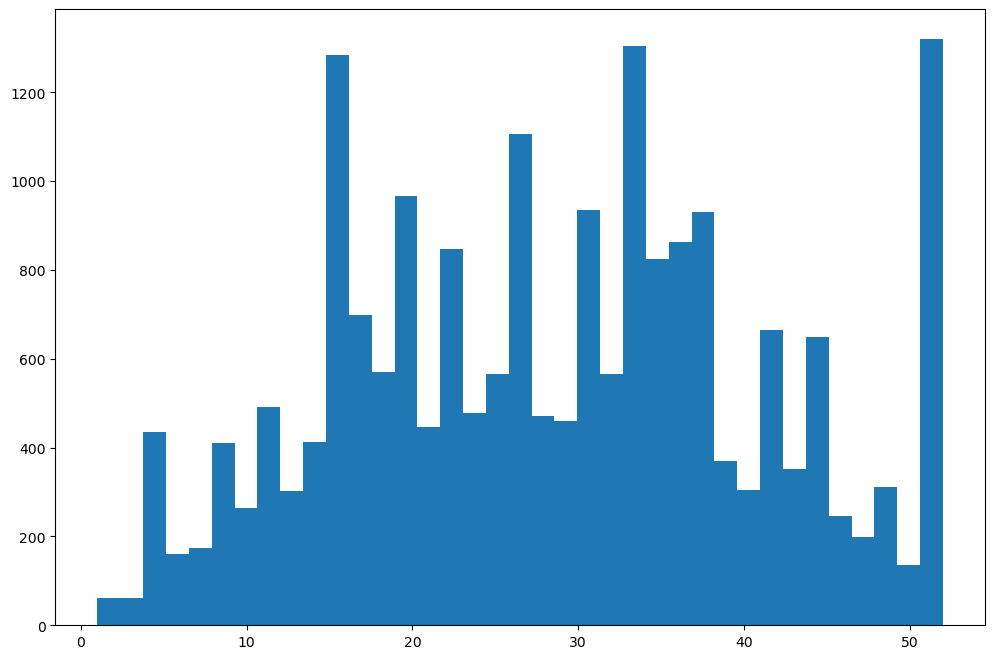

In [39]:
plt.figure(figsize=(12, 8))
plt.hist(house_data.HouseAge, bins = 'fd')
plt.show()

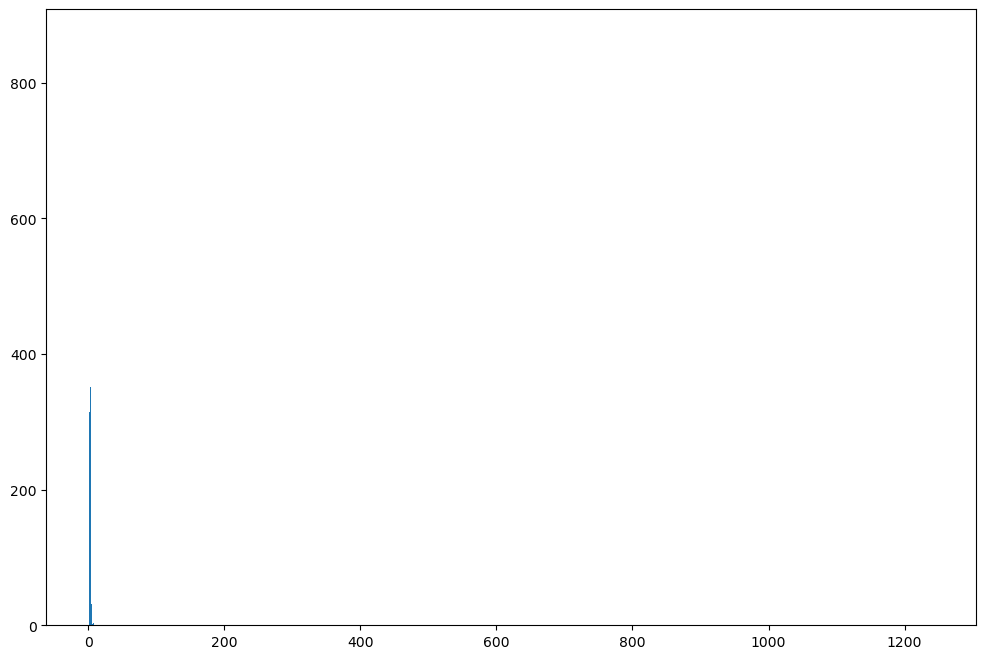

In [44]:
plt.figure(figsize=(12, 8))
plt.hist(house_data.AveOccup, bins = 'fd')
plt.show()

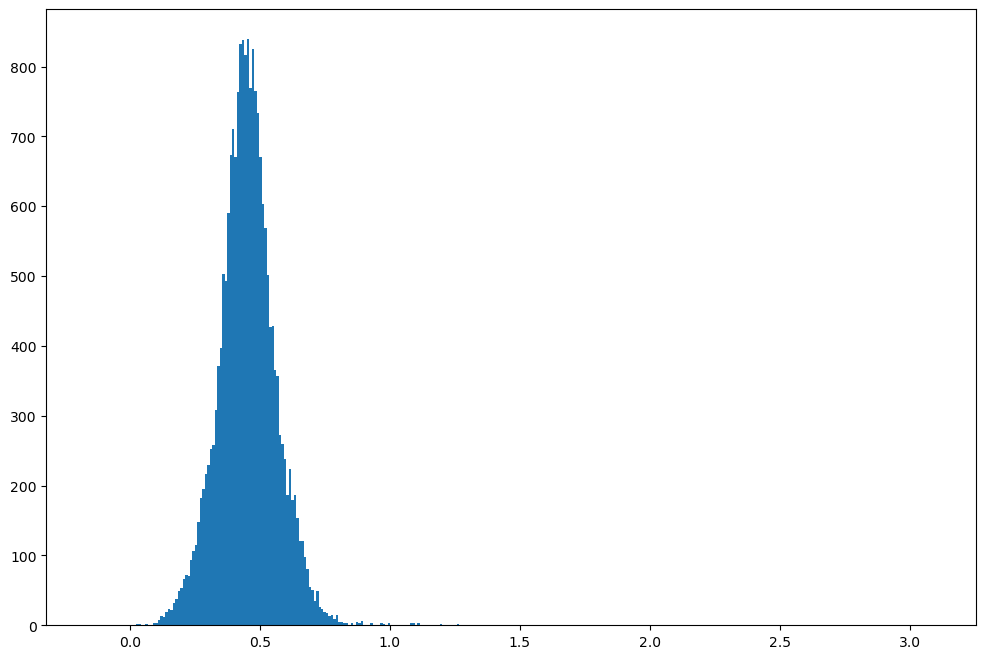

In [45]:
plt.figure(figsize=(12, 8))
plt.hist(np.log10(house_data.AveOccup), bins = 'fd')
plt.show()

In [48]:
house_data[np.log10(house_data.AveOccup) > 1.5].sort_values('AveOccup')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29,1.62500
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500


# target exploration

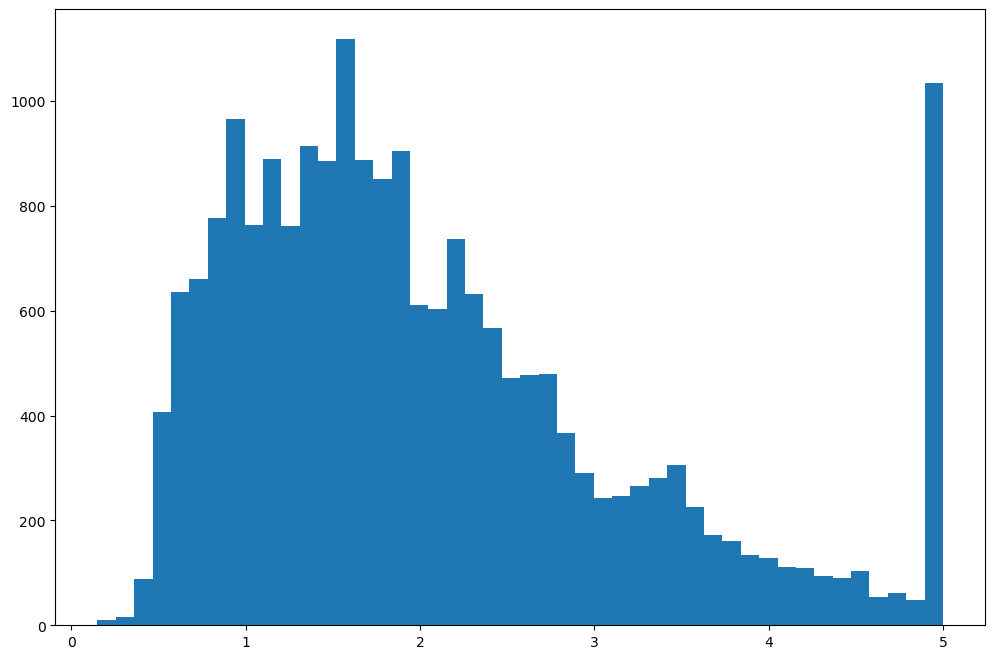

In [77]:
plt.figure(figsize=(12, 8))
plt.hist(house_data.MedHouseVal, bins = 'fd')
plt.show()

In [80]:
house_data[house_data.MedHouseVal > 5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


In [81]:
house_data[house_data.MedHouseVal > 5].MedHouseVal.unique()

array([5.00001])

In [83]:
house_data = house_data[house_data.MedHouseVal <= 5] # remove the MedHouseVal > 5, since they are a special case and cover houses with values > 500 thousands

# Linear Regression

# model fitting

In [84]:
house_model = LinearRegression()
house_model

LinearRegression()

erronouse approach: input all data including the target

In [85]:
house_model.fit(house_data, house_data.MedHouseVal)

LinearRegression()

In [86]:
house_model.coef_

array([-1.30694079e-16,  2.83093037e-16,  6.94696861e-16, -2.02227071e-15,
        8.57473195e-18, -8.34221399e-17, -6.50053972e-17,  5.31564515e-16,
        1.00000000e+00])

In [87]:
house_model.feature_names_in_

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'], dtype=object)

In [88]:
list(zip(house_model.feature_names_in_, house_model.coef_))

[('MedInc', -1.3069407856908105e-16),
 ('HouseAge', 2.830930367049993e-16),
 ('AveRooms', 6.946968607704144e-16),
 ('AveBedrms', -2.0222707103394475e-15),
 ('Population', 8.5747319463572e-18),
 ('AveOccup', -8.342213988122494e-17),
 ('Latitude', -6.50053971599871e-17),
 ('Longitude', 5.315645150786718e-16),
 ('MedHouseVal', 1.0000000000000007)]

correct approach

In [89]:
house_attributes = house_data.drop(columns = ['MedHouseVal'])
target = house_data.MedHouseVal

In [90]:
house_model.fit(house_attributes, target)

LinearRegression()

In [91]:
list(zip(house_model.feature_names_in_, house_model.coef_))

[('MedInc', 0.43203999075155325),
 ('HouseAge', 0.008178957814135924),
 ('AveRooms', -0.11051221552017867),
 ('AveBedrms', 0.6134539079605462),
 ('Population', 4.5934758965291635e-06),
 ('AveOccup', -0.003447720551817134),
 ('Latitude', -0.3794033795650469),
 ('Longitude', -0.3959098468967255)]

## MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [93]:
scaler.fit(house_data) # the scaler learns the data

MinMaxScaler()

In [94]:
scaler.data_min_

array([   0.4999    ,    1.        ,    0.84615385,    0.33333333,
          3.        ,    0.69230769,   32.54      , -124.35      ,
          0.14999   ])

In [95]:
scaler.transform(house_data)

array([[0.53966842, 0.78431373, 0.04661026, ..., 0.5674814 , 0.21115538,
        0.90226824],
       [0.53802706, 0.39215686, 0.04094539, ..., 0.565356  , 0.21215139,
        0.70824802],
       [0.46602805, 1.        , 0.05651258, ..., 0.5642933 , 0.21015936,
        0.69505218],
       ...,
       [0.08276438, 0.31372549, 0.03310413, ..., 0.73219979, 0.31175299,
        0.15938318],
       [0.09429525, 0.33333333, 0.03404552, ..., 0.73219979, 0.30179283,
        0.14371311],
       [0.13025338, 0.29411765, 0.03347754, ..., 0.72582359, 0.30976096,
        0.15340381]])

In [96]:
house_data.min(axis = 0)

MedInc           0.499900
HouseAge         1.000000
AveRooms         0.846154
AveBedrms        0.333333
Population       3.000000
AveOccup         0.692308
Latitude        32.540000
Longitude     -124.350000
MedHouseVal      0.149990
dtype: float64

In [97]:
house_data.max(axis = 0)

MedInc            15.000100
HouseAge          52.000000
AveRooms         132.533333
AveBedrms         34.066667
Population     35682.000000
AveOccup        1243.333333
Latitude          41.950000
Longitude       -114.310000
MedHouseVal        5.000000
dtype: float64

In [98]:
scaler.fit_transform(house_data)

array([[0.53966842, 0.78431373, 0.04661026, ..., 0.5674814 , 0.21115538,
        0.90226824],
       [0.53802706, 0.39215686, 0.04094539, ..., 0.565356  , 0.21215139,
        0.70824802],
       [0.46602805, 1.        , 0.05651258, ..., 0.5642933 , 0.21015936,
        0.69505218],
       ...,
       [0.08276438, 0.31372549, 0.03310413, ..., 0.73219979, 0.31175299,
        0.15938318],
       [0.09429525, 0.33333333, 0.03404552, ..., 0.73219979, 0.30179283,
        0.14371311],
       [0.13025338, 0.29411765, 0.03347754, ..., 0.72582359, 0.30976096,
        0.15340381]])

In [102]:
house_attributes_scaled = scaler.fit_transform(house_attributes)

In [103]:
house_model_scaled = LinearRegression()
house_model_scaled.fit(house_attributes_scaled, target)

LinearRegression()

In [105]:
list(zip(house_model.feature_names_in_, house_model_scaled.coef_))

[('MedInc', 6.2646662738956715),
 ('HouseAge', 0.41712684852093235),
 ('AveRooms', -14.553041960731635),
 ('AveBedrms', 20.693845161869014),
 ('Population', 0.16389062651233757),
 ('AveOccup', -4.2842790026338005),
 ('Latitude', -3.5701858017070993),
 ('Longitude', -3.9749348628431282)]

## StandardScaler

In [108]:
z_score = StandardScaler()

In [111]:
z_score = z_score.fit_transform(house_attributes)

In [112]:
z_score

array([[ 2.96038034,  1.00838834,  0.70806549, ..., -0.050757  ,
         1.03650334, -1.32937755],
       [ 2.94522334, -0.5904867 ,  0.3826581 , ..., -0.09268007,
         1.02719992, -1.32439265],
       [ 2.28035331,  1.88776961,  1.27688557, ..., -0.02755242,
         1.02254821, -1.33436245],
       ...,
       [-1.25886958, -0.9102617 , -0.06776868, ..., -0.07238292,
         1.75751838, -0.82590242],
       [-1.15238848, -0.83031795, -0.0136918 , ..., -0.09142276,
         1.75751838, -0.87575144],
       [-0.82033558, -0.99020545, -0.04631844, ..., -0.04497942,
         1.72960812, -0.83587222]])

In [113]:
z_score.shape

(19675, 8)

## Modelling with z-score data

In [116]:
z_score_model = LinearRegression()

In [117]:
z_score_model.fit(z_score, target)

LinearRegression()

In [118]:
list(zip(house_model.feature_names_in_, z_score_model.coef_))

[('MedInc', 0.6784028909722377),
 ('HouseAge', 0.10230890631596948),
 ('AveRooms', -0.253347034732133),
 ('AveBedrms', 0.27717527061724145),
 ('Population', 0.005253189350408495),
 ('AveOccup', -0.0366551542212348),
 ('Latitude', -0.8156213233862962),
 ('Longitude', -0.7942178625015122)]

In [120]:
z_score_model.score(z_score, target) # R^2 coefficient of determination

0.5701011070331932

# Regression with outliers
# Random Sample Consensus (RANSAM)

In [122]:
ransac_model = RANSACRegressor()

In [123]:
ransac_model.fit(house_attributes_scaled, target)

RANSACRegressor()

In [124]:
ransac_model.estimator_.coef_

array([ 4.67184021e+00,  1.37077675e-01,  1.05444619e+01,  1.07005894e+02,
        4.74062715e+00, -2.35770868e+02, -3.53560588e+00, -3.44162170e+00])

In [126]:
ransac_model.inlier_mask_ # how many of the data were in

array([False,  True,  True, ...,  True,  True,  True])

In [127]:
ransac_model.inlier_mask_.sum()

12044

In [136]:
house_attributes[ransac_model.inlier_mask_]  # data in the sample

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
12,3.0750,52.0,5.322650,1.012821,1098.0,2.346154,37.85,-122.26
...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [129]:
house_attributes[~ransac_model.inlier_mask_] # data out of the sample

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
...,...,...,...,...,...,...,...,...
20608,1.7167,24.0,5.400000,1.273171,768.0,3.746341,39.10,-121.59
20620,4.5625,40.0,4.125000,0.854167,151.0,3.145833,39.05,-121.48
20621,2.3661,37.0,7.923567,1.573248,484.0,3.082803,39.01,-121.47
20625,4.1250,37.0,7.285714,1.214286,29.0,2.071429,39.12,-121.52


In [132]:
house_model_scaled.score(house_attributes_scaled, target)

0.5701011070331933

In [133]:
ransac_model.score(house_attributes_scaled, target)

-6.093670244721477

A negative result indicates that the model predicting the arithmetic mean is better than this one.

In [135]:
ransac_model.score(house_attributes_scaled[ransac_model.inlier_mask_], target[ransac_model.inlier_mask_])

0.8393477540639419

RANSACRegressor(estimator = None) ? by default Linear Regression, but it could be any other ML algorithm RandomForest, MLP, etc.

In [138]:
ransac_model = RANSACRegressor(residual_threshold = 0.5)

In [139]:
ransac_model.fit(house_attributes_scaled, target)

RANSACRegressor(residual_threshold=0.5)

In [140]:
ransac_model_threshold = ransac_model.fit(house_attributes_scaled, target)
ransac_model_threshold.inlier_mask_.sum() / len(house_attributes_scaled)

0.5490724269377383

another threshold -> different number of inliers

In [141]:
ransac_model = RANSACRegressor(residual_threshold = 1)

In [142]:
ransac_model.fit(house_attributes_scaled, target)

RANSACRegressor(residual_threshold=1)

In [143]:
ransac_model_threshold = ransac_model.fit(house_attributes_scaled, target)
ransac_model_threshold.inlier_mask_.sum() / len(house_attributes_scaled)

0.8373062261753494

max_trials -> number of trials; more trials, more data to be covered and not missed

In [144]:
ransac_model = RANSACRegressor(residual_threshold = 0.5, max_trials = 1000)

In [145]:
ransac_model.fit(house_attributes_scaled, target)

RANSACRegressor(max_trials=1000, residual_threshold=0.5)

In [146]:
ransac_model_threshold = ransac_model.fit(house_attributes_scaled, target)
ransac_model_threshold.inlier_mask_.sum() / len(house_attributes_scaled)

0.5882083862770012

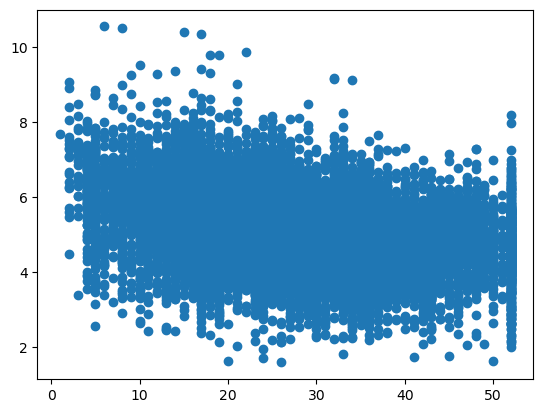

In [149]:
plt.scatter(house_attributes[ransac_model.inlier_mask_].HouseAge, house_attributes[ransac_model.inlier_mask_].AveRooms)

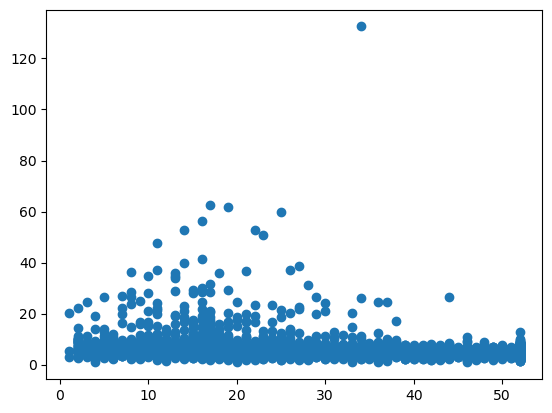

In [150]:
plt.scatter(house_attributes[~ransac_model.inlier_mask_].HouseAge, house_attributes[~ransac_model.inlier_mask_].AveRooms)

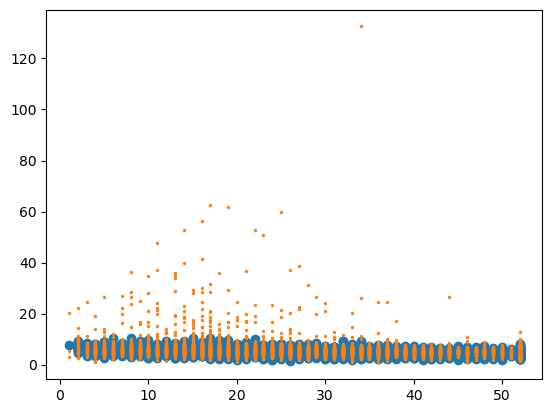

In [153]:
plt.scatter(house_attributes[ransac_model.inlier_mask_].HouseAge, house_attributes[ransac_model.inlier_mask_].AveRooms)
plt.scatter(house_attributes[~ransac_model.inlier_mask_].HouseAge, house_attributes[~ransac_model.inlier_mask_].AveRooms, s = 2)

# Polynomial regression